In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time

In [2]:
x_train=[]
x_test=[]
y_train=[]
y_test=[]

####################### Creating the dataset
i=0
while(i<100):
    if(i%10):
        x_train.append(cv2.imread('data/zero/'+str(i)+'.jpeg'));y_train.append(0)
        x_train.append(cv2.imread('data/one/1'+str(i).zfill(2)+'.jpeg'));y_train.append(1)
        x_train.append(cv2.imread('data/two/2'+str(i).zfill(2)+'.jpeg'));y_train.append(2)
        x_train.append(cv2.imread('data/three/3'+str(i).zfill(2)+'.jpeg'));y_train.append(3)
        x_train.append(cv2.imread('data/four/4'+str(i).zfill(2)+'.jpeg'));y_train.append(4)
        x_train.append(cv2.imread('data/five/5'+str(i).zfill(2)+'.jpeg'));y_train.append(5)
        x_train.append(cv2.imread('data/none/6'+str(i).zfill(2)+'.jpeg'));y_train.append(6)
        i+=1
    else:
        x_test.append(cv2.imread('data/zero/'+str(i)+'.jpeg'));y_test.append(0)
        x_test.append(cv2.imread('data/one/1'+str(i).zfill(2)+'.jpeg'));y_test.append(1)
        x_test.append(cv2.imread('data/two/2'+str(i).zfill(2)+'.jpeg'));y_test.append(2)
        x_test.append(cv2.imread('data/three/3'+str(i).zfill(2)+'.jpeg'));y_test.append(3)
        x_test.append(cv2.imread('data/four/4'+str(i).zfill(2)+'.jpeg'));y_test.append(4)
        x_test.append(cv2.imread('data/five/5'+str(i).zfill(2)+'.jpeg'));y_test.append(5)
        x_test.append(cv2.imread('data/none/6'+str(i).zfill(2)+'.jpeg'));y_test.append(6)
        i+=1

######################## Normalizing the data
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test) 

model=tf.keras.models.Sequential()

######################### layers in model
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(7,activation=tf.nn.softmax))

######################### properties of model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

######################### running/training the model on x_train
model.fit(x_train,y_train, epochs=4)

######################### testing model on x_test and calculating Accuracy, prediction values.
val_loss,val_acc=model.evaluate(x_test,y_test)
print("\n\nloss    %: ",val_loss, "\naccuracy%: ",val_acc,"\n\n")
prediction=model.predict([x_test])

######################### Saving the model as gesture_model
tf.keras.models.save_model(
    model,
    "final_model.model",
    overwrite=True,
    include_optimizer=True
)
print("\n\nModel SAVED\n\n")

Epoch 1/4
630/630 [==============================] - 1s 2ms/step - loss: 0.9373 - acc: 0.7222
Epoch 2/4
630/630 [==============================] - 1s 1ms/step - loss: 0.3285 - acc: 0.9857
Epoch 3/4
630/630 [==============================] - 1s 2ms/step - loss: 0.2642 - acc: 0.9937
Epoch 4/4
70/70 [==============================] - 0s 1ms/step


loss    %:  0.7503969158445086 
accuracy%:  0.9285714285714286 




Model SAVED




prediction:  1
actual    :  1


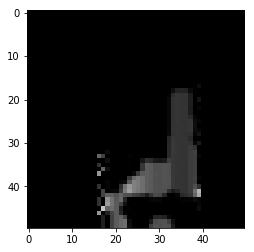

In [4]:
######################### testing for random image in x_test[i]
i=29
print("prediction: ",np.argmax(prediction[i]))
print("actual    : ",y_test[i])
plt.imshow(x_test[i],cmap=plt.cm.binary)
plt.show()

In [10]:
import subprocess as sp
from imutils.video import VideoStream
from imutils.video import FPS
import time

In [11]:
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()

ind=0;indn=0;ctr=0;
while True:
    framee=vs.read()
    framee=cv2.flip(framee,1)
    roi=framee[100:300, 100:300]
    cv2.rectangle(framee,(100,100),(300,300),(0,255,0),0)    
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    lower_skin = np.array([0,20,70], dtype=np.uint8)
    upper_skin = np.array([20,255,255], dtype=np.uint8)
    frame = cv2.inRange(hsv, lower_skin, upper_skin)
    
    kernel = np.ones((3,3),np.uint8)
    frame = cv2.dilate(frame,kernel,iterations = 7)
    frame = cv2.erode(frame,kernel,iterations = 3)
    frame = cv2.GaussianBlur(frame,(5,5),100)
    frame = cv2.resize(frame,(50,50))
    cv2.imwrite('current.jpeg',frame)
    x_test2=[]
    x_test2.append(cv2.imread('current.jpeg'))
    x_test2=tf.keras.utils.normalize(x_test2,axis=1)
    predn=model.predict([x_test2])
    indn=np.argmax(predn[0]);per=(predn[0])[indn];
#     print("prediction :", indn, "\n%surety    :", per)
    
    cv2.imshow('lol',framee)
    cv2.imshow('lol',frame)
    time.sleep(0.1)
    if(indn==ind):
        ctr+=1
        if(ctr>30):
            ctr=0
            print('\n',indn,'\n')
            val=indn
            if(val==0):
                continue;
            elif(val==1):
                sp.call(['chrome.exe'])
            elif(val==2):
                continue;
            elif(val==3):
                continue;
            elif(val==4):
                break;
            elif(val==5):
                sp.call(['rundll32.exe', 'user32.dll,LockWorkStation'])
            elif(val==6):
                print("\n\n\nHAAND NOT DETECTED\n\n");
            time.sleep(2)
    else:
        ctr=0
    ind=indn
    
vs.stop()
cv2.destroyAllWindows()

[INFO] starting video stream...

 0 


 0 


 5 


 6 




HAAND NOT DETECTED



 5 


 2 


 2 


 5 


 5 


 2 


 2 


 2 


 2 


 4 

